In [1]:
# gradient descent 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# iputput feature and output feature
x = tf.constant([[1.], [2.], [3.], [4.]],dtype=tf.float64)
y = tf.constant([[2.], [4.], [6.], [8.]],dtype=tf.float64)
print(x.numpy())

[[1.]
 [2.]
 [3.]
 [4.]]


In [4]:
# weight initialization
def weight_initialization(fan_in,fan_out):
    limit=tf.math.sqrt(6/tf.add(fan_in,fan_out))
    return tf.Variable(tf.random.uniform([fan_in,fan_out],minval=-limit,maxval=limit,dtype=tf.float64))

w=weight_initialization(1,1)
b=tf.Variable(tf.zeros([1,1],dtype=tf.float64))
print(b.numpy())

[[0.]]


In [5]:
# preactivation 
def pre_activation(w,b,x):
    preactivation=tf.add(tf.matmul(x,w),b)
    return preactivation    

In [6]:
# sigmoid activation 
pre=pre_activation(w,b,x)
def activation(pre):
    return 1/(1+tf.math.exp(-pre))

In [7]:
# loss calculation here we hace only one neuron so thats why we are taking activation funtion
y_pred=pre_activation(w,b,x)
def loss(y,y_pred):
    loss=tf.reduce_mean(tf.square(tf.subtract(y,y_pred)))
    return loss

In [10]:
# compute the derivative of loss with respect to weights and update the weights using gradient descent optimization algorihm
losses=[]
learning_rate=0.001
for i in range(100):
    with tf.GradientTape() as tape:
        y_pred=pre_activation(w,b,x)
        current_loss=loss(y,y_pred)
        gradient=tape.gradient(current_loss,[w,b])
        w.assign_sub(learning_rate*gradient[0])
        b.assign_sub(learning_rate*gradient[1])
        losses.append(current_loss.numpy())
    
    

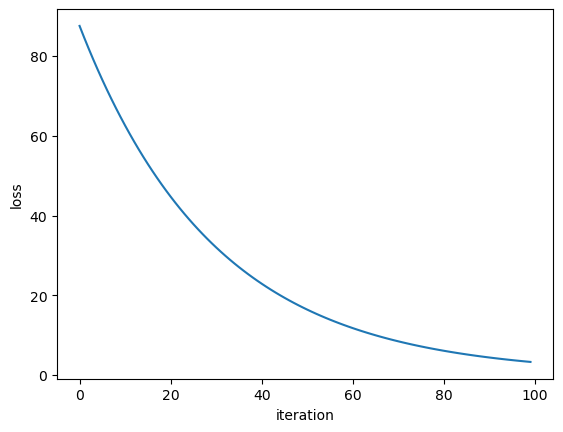

In [11]:
# plot the losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [14]:
# prediction on new data
def model_prediction(x,y):
    y_pred=tf.add(tf.matmul(x,w),b)
    return y_pred

In [15]:
pred=model_prediction(x,y)
print(pred.numpy())

[[1.90533786]
 [2.9930476 ]
 [4.08075735]
 [5.1684671 ]]


In [16]:
# actual y values
print(y.numpy())

[[2.]
 [4.]
 [6.]
 [8.]]
